
# Diabetes Prediction — 01 EDA

**Goal:** Explore the Pima Indians Diabetes dataset to understand feature distributions, missing values, class balance, and correlations.

**Dataset path (relative to this notebook):** `../data/diabetes.csv`


In [1]:

# ===============
# 0. Setup
# ===============
import os
import sys
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plot config
plt.rcParams['figure.figsize'] = (8, 5)
plt.rcParams['axes.grid'] = True

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)

DATA_PATH = os.path.join('C:/Users/nazar/OneDrive/Documentos/machine learning/diabetes.csv')
assert os.path.exists(DATA_PATH), f"Dataset not found at {DATA_PATH}. Please place the CSV file there."


In [13]:
# ===============
# 1. Load data
# ===============
df = pd.read_csv(DATA_PATH, sep=";")  # <--- agregamos sep=";" para separar correctamente
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
display(df.head())



Shape: (768, 9)
Columns: ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [14]:

# ===============
# 2. Quick overview
# ===============
display(df.info())
display(df.describe().T)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


None

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00



### About "zeros" as missing values
In this dataset, certain features use **0** to represent missing measurements. Common columns:
- `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, `BMI`

We'll convert 0 → NaN for these to correctly analyze missingness.


In [15]:

# Columns where 0 means 'missing'
zero_as_missing = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df_clean = df.copy()
for col in zero_as_missing:
    if col in df_clean.columns:
        df_clean[col] = df_clean[col].replace(0, np.nan)

# Missing summary
missing_counts = df_clean.isna().sum().sort_values(ascending=False)
missing_ratio = (missing_counts / len(df_clean)).round(3)
missing_table = pd.DataFrame({'missing_count': missing_counts, 'missing_ratio': missing_ratio})
display(missing_table[missing_table['missing_count'] > 0])


,missing_count,missing_ratio
Insulin,374,0.487
SkinThickness,227,0.296
BloodPressure,35,0.046
BMI,11,0.014
Glucose,5,0.007



### Class balance
Check the distribution of the target variable `Outcome` (1 = Diabetes, 0 = No Diabetes).


,count,ratio
Outcome,,
0,500,0.651
1,268,0.349


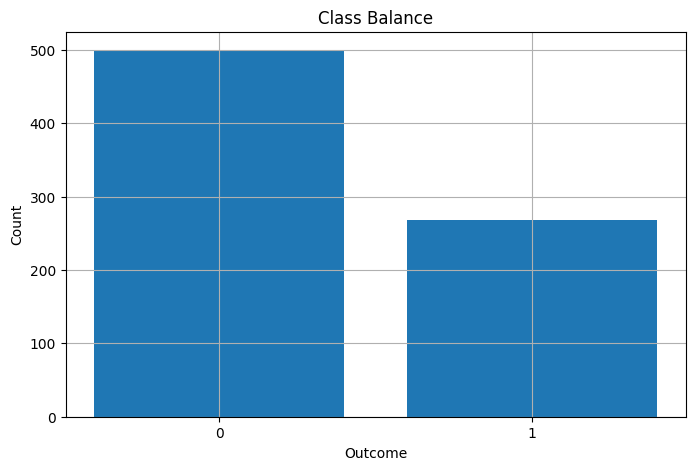

In [16]:

target_col = 'Outcome'
class_counts = df_clean[target_col].value_counts(dropna=False).sort_index()
class_ratio = (class_counts / class_counts.sum()).round(3)
class_summary = pd.DataFrame({'count': class_counts, 'ratio': class_ratio})
display(class_summary)

# Bar plot (matplotlib only, no styles)
fig, ax = plt.subplots()
ax.bar(class_summary.index.astype(str), class_summary['count'])
ax.set_xlabel('Outcome')
ax.set_ylabel('Count')
ax.set_title('Class Balance')
plt.show()



### Distributions
Look at feature distributions to spot skew, outliers, and ranges.


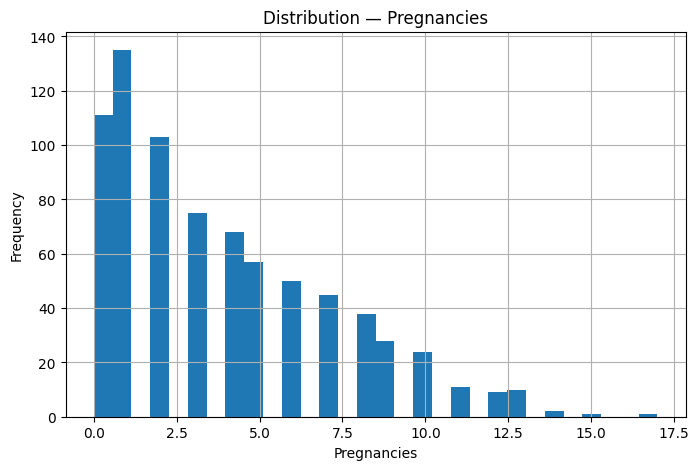

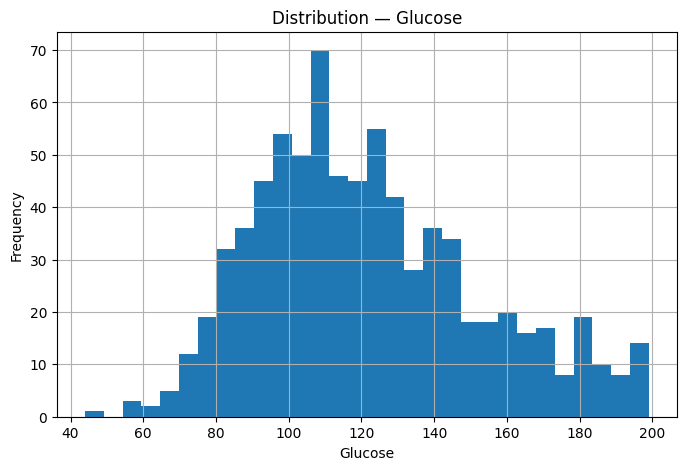

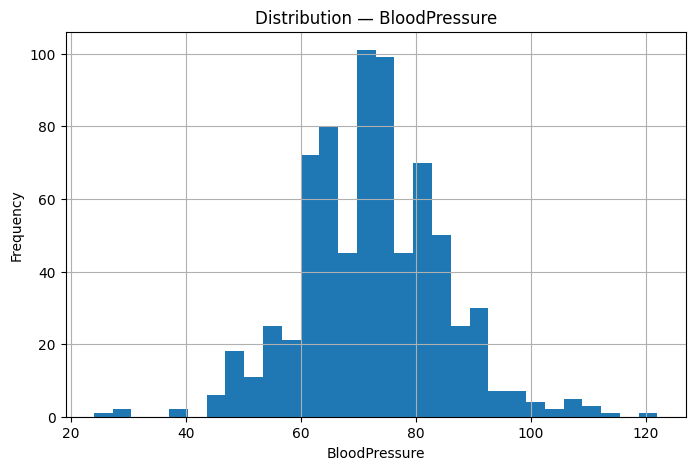

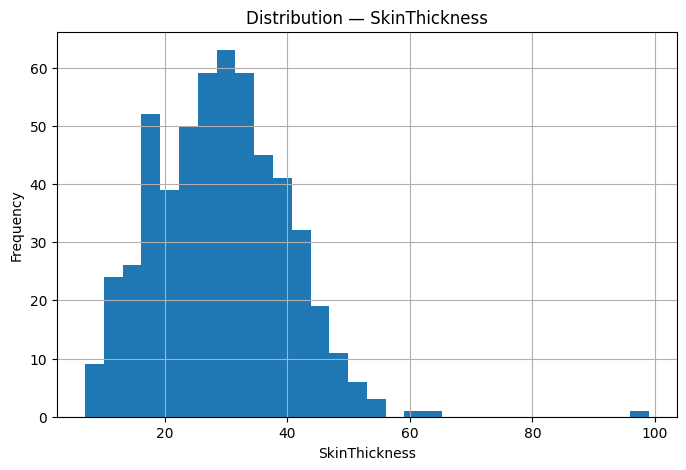

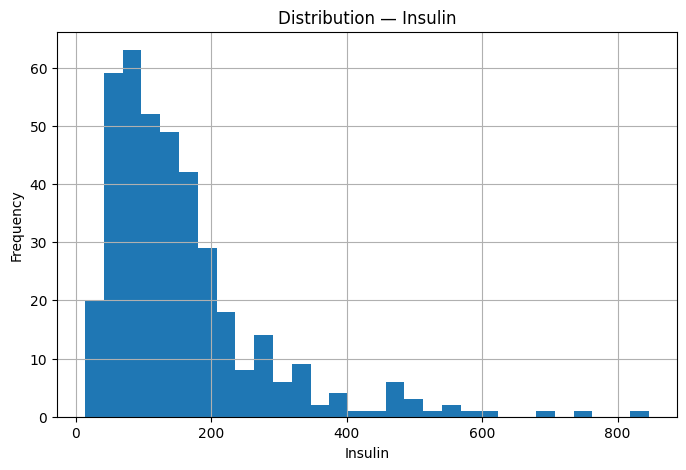

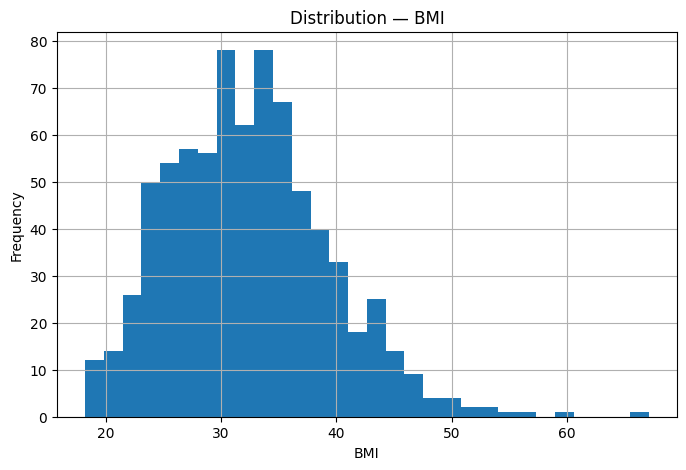

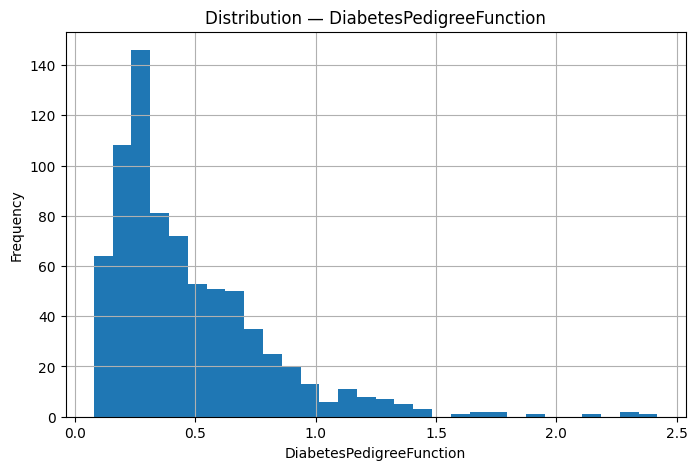

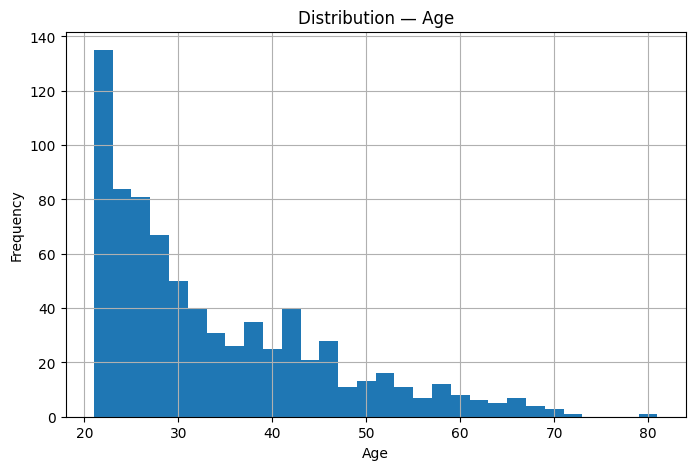

In [17]:

feature_cols = [c for c in df_clean.columns if c != target_col]

# Histograms
for col in feature_cols:
    fig, ax = plt.subplots()
    ax.hist(df_clean[col].dropna(), bins=30)
    ax.set_title(f'Distribution — {col}')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    plt.show()



### Boxplots by class
Visualize differences in distributions between Outcome classes.


C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


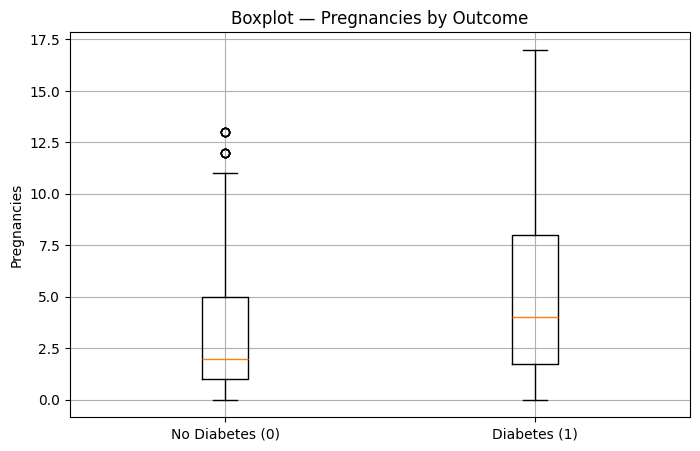

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


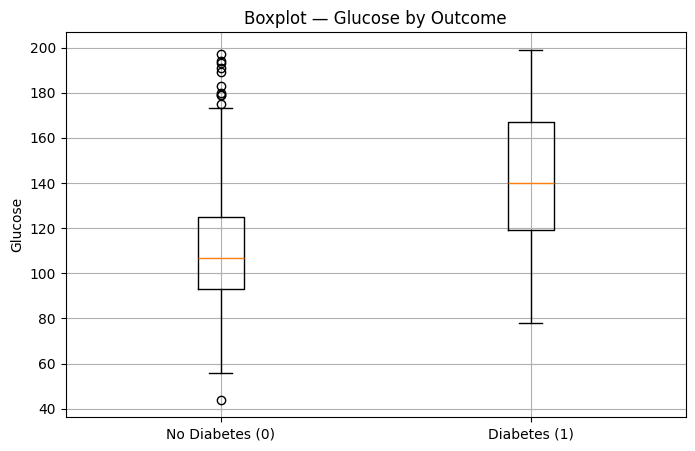

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


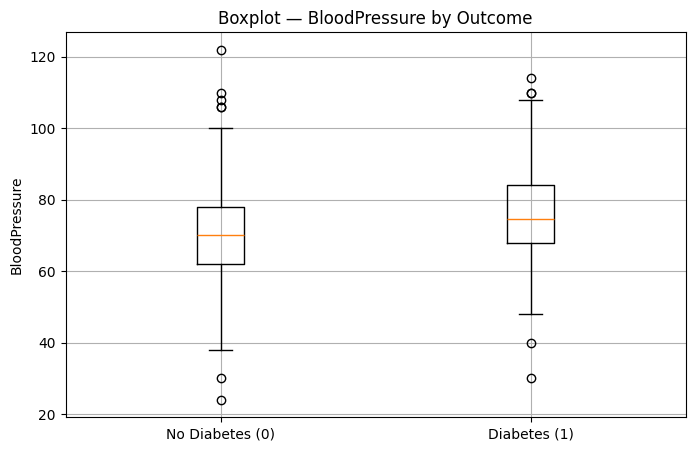

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


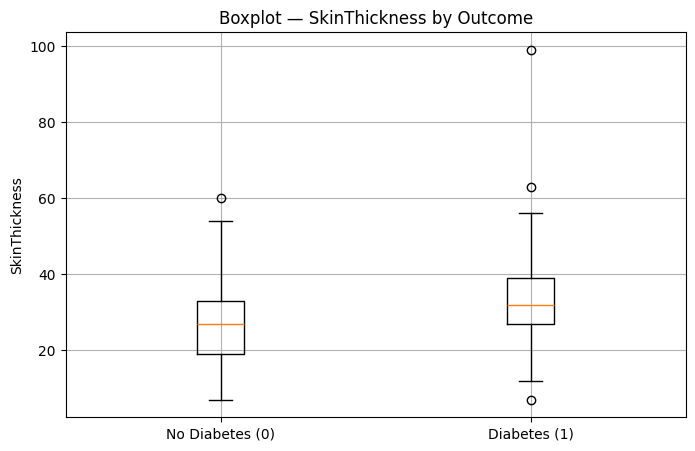

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


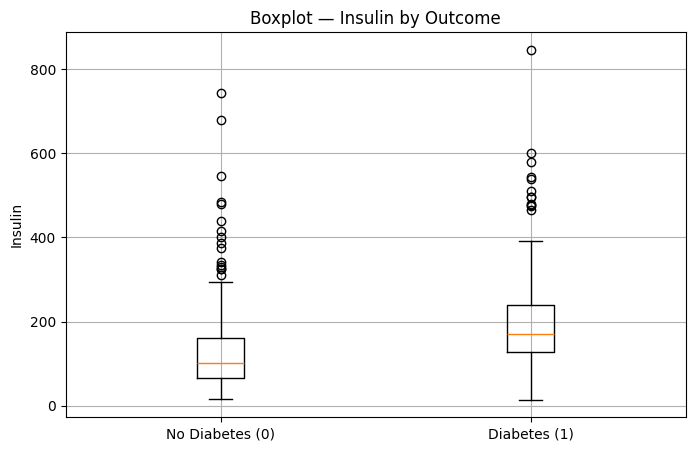

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


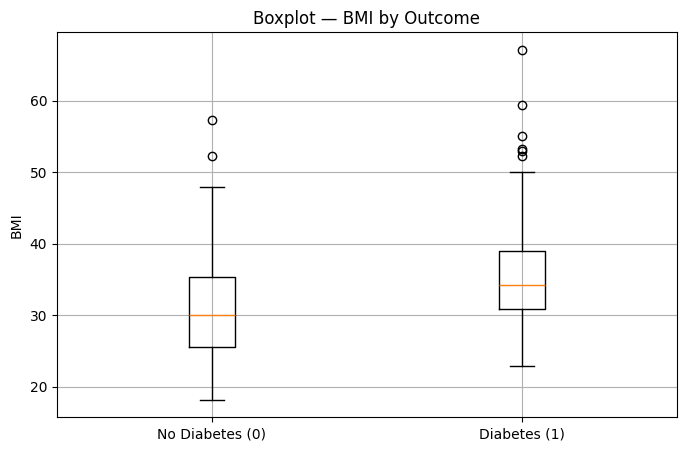

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


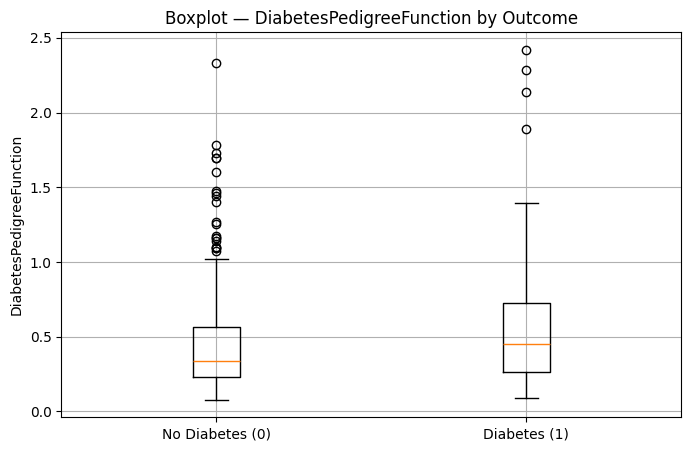

C:\Users\nazar\AppData\Local\Temp\ipykernel_7608\787247708.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)


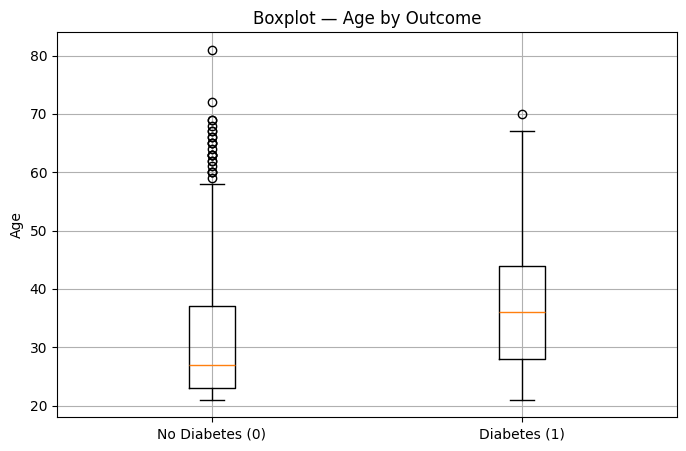

In [18]:

for col in feature_cols:
    fig, ax = plt.subplots()
    # Create two arrays for each class
    data0 = df_clean.loc[df_clean[target_col] == 0, col].dropna()
    data1 = df_clean.loc[df_clean[target_col] == 1, col].dropna()
    ax.boxplot([data0, data1], labels=['No Diabetes (0)', 'Diabetes (1)'], showfliers=True)
    ax.set_title(f'Boxplot — {col} by Outcome')
    ax.set_ylabel(col)
    plt.show()



### Correlation analysis
Compute Pearson correlation for numeric variables and visualize a simple correlation matrix.


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


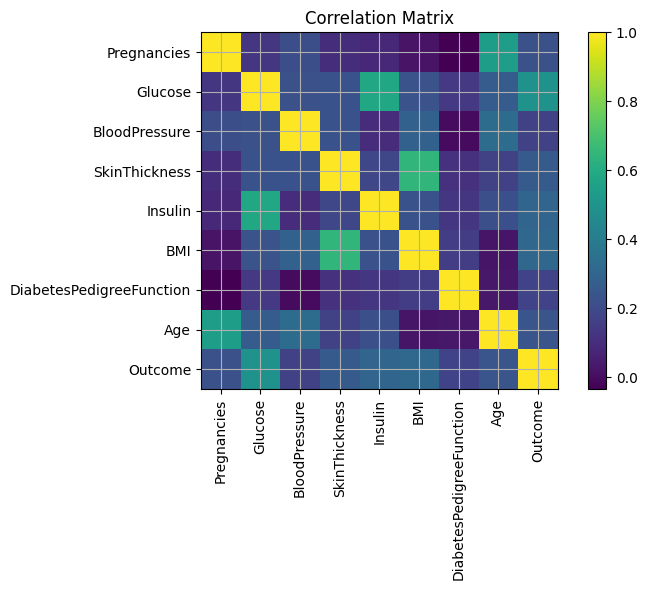

In [19]:

numeric_df = df_clean.select_dtypes(include=[np.number])
corr = numeric_df.corr(numeric_only=True)

display(corr.style.background_gradient(axis=None, cmap='Greys'))  # rendered as a styled table

# Also show a plain matplotlib image for correlation matrix values
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(corr, interpolation='nearest')
ax.set_title('Correlation Matrix')
ax.set_xticks(range(len(corr.columns)))
ax.set_yticks(range(len(corr.columns)))
ax.set_xticklabels(corr.columns, rotation=90)
ax.set_yticklabels(corr.columns)
fig.colorbar(cax)
plt.tight_layout()
plt.show()



### Notes & Findings
Use this section to write observations:
- Which features differ the most between classes?
- Are there missing patterns worth addressing?
- Any strong correlations or multicollinearity?
- Potential feature engineering ideas.



---

## Optional: simple imputation for later modeling
We won't model here, but you can prepare a processed dataset with median imputation for numeric columns.


In [24]:
import os

# Ruta completa al archivo CSV
out_path = os.path.join('C:/Users/nazar/OneDrive/Documentos/machine learning', 
                        'diabetes_processed.csv')

# Crear carpeta si no existe
os.makedirs(os.path.dirname(out_path), exist_ok=True)

# Guardar dataset procesado
processed.to_csv(out_path, index=False)
print(f'Processed dataset saved to: {out_path}')


Processed dataset saved to: C:/Users/nazar/OneDrive/Documentos/machine learning\diabetes_processed.csv
